# ATP Tennis Matches Predictor

Project for predicting ATP tennis match outcomes using machine learning algorithms with scikit-learn. The goal is to forecast the result of head-to-head matches between two players based on their individual statistics in the world’s premier professional tennis circuit.

Data: https://github.com/JeffSackmann/tennis_atp.git

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data/raw/matches/atp_matches_1968.csv')
df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1968-2029,Dublin,Grass,32.0,A,19680708,270,112411,NaN,NaN,Doug Smith,U,NaN,AUS,NaN,110196,NaN,NaN,Peter Ledbetter,U,NaN,IRL,24.0,6-1 7-5,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1968-2029,Dublin,Grass,32.0,A,19680708,271,126914,NaN,NaN,Louis Pretorius,R,NaN,RSA,NaN,209536,NaN,NaN,Maurice Pollock,U,NaN,IRL,NaN,6-1 6-1,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1968-2029,Dublin,Grass,32.0,A,19680708,272,209523,NaN,NaN,Cecil Pedlow,U,NaN,IRL,NaN,209535,NaN,NaN,John Mulvey,U,NaN,IRL,NaN,6-2 6-2,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1968-2029,Dublin,Grass,32.0,A,19680708,273,100084,NaN,NaN,Tom Okker,R,178.0,NED,24.3,209534,NaN,NaN,Unknown Fearmon,U,NaN,NaN,NaN,6-1 6-1,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1968-2029,Dublin,Grass,32.0,A,19680708,274,100132,NaN,NaN,Armistead Neely,R,NaN,USA,21.3,209533,NaN,NaN,Harry Sheridan,U,NaN,IRL,NaN,6-2 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4372,1968-T167,Hanau,NaN,NaN,A,19680822,106,147290,NaN,NaN,Reinhard Pieper,U,NaN,FRG,NaN,112637,NaN,NaN,Peter Scholl,U,NaN,GER,33.8,7-5 6-4 6-4,5,SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4373,1968-T167,Hanau,NaN,NaN,A,19680822,107,145307,NaN,NaN,Arthur Schroder,U,NaN,FRG,NaN,147290,NaN,NaN,Reinhard Pieper,U,NaN,FRG,NaN,6-4 1-6 6-4 6-0,5,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4374,1968-T168,Narberth,Hard,NaN,A,19681002,101,147982,NaN,NaN,Al Chassard,U,NaN,USA,NaN,148496,NaN,NaN,Dave Perchonock,U,NaN,USA,NaN,6-2 6-3,3,SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4375,1968-T168,Narberth,Hard,NaN,A,19681002,102,148497,NaN,NaN,Bob Kaufman,U,NaN,USA,NaN,114747,NaN,NaN,Harry Hoffman Jr,U,NaN,USA,NaN,6-2 6-3,3,SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Dictionary
- **tourney_id**: Unique identifier for each tournament. The exact formats are borrowed from several different sources, so while the first four characters are always the year, the rest of the ID doesn't follow a predictable structure

- **tourney_name**: Tournament name

- **surface**: Type of tennis court surface of the tournament

- **draw_size**: Number of players in the draw, often rounded up to the nearest power of 2. (For instance, a tournament with 28 players may be shown as 32.)

- **tourney_level**: Specify the tournament type
    - **A** = Other tour-level events
    - **C** = Challengers
    - **D** = Davis Cup 
    - **F** = Tour finals and other season-ending events
    - **G** = Grand Slams
    - **M** = Masters 1000s
    - **S** = Satellites/ITFs

- **tourney_date**: Eight digits, YYYYMMDD, usually the Monday of the tournament week.

- **match_num**: A match-specific identifier. Often starting from 1, sometimes counting down from 300, and sometimes arbitrary. 

- **winner_id / loser_id**: Player ID

- **winner_seed / loser_seed**: IDK

- **winner_entry / loser_entry**: Specify how the player entered the tournament   
    - **WC** = Wild card
    - **Q** = Qualifier
    - **LL** = Lucky loser
    - **PR** = Protected ranking
    - **ITF** = ITF entry, and there are a few others that are occasionally used

- **winner_name / loser_name**: Player name

- **winner_hand / loser_hand**: Specify the dominant hand
    - **L** = Left-handed
    - **R** = Right-handed
    - **U** = Unknown

- **winner_ht / loser_ht**: Player Height in centimeters

- **winner_ioc / loser_ioc**: Player country code (3 char)

- **winner_age / loser_age**: Player age at that tournament date

- **score**: Match score

- **best_of**: Max num of sets (3 or 5)

- **round**: Match round

- **w_ace / l_ace**: Player number of aces

- **w_df / l_df**: Player number of doubles faults

- **w_svpt / l_svpt**: Player number of serve points

- **w_1stIn / l_1stIn**: Player number of first serves made

- **w_1stWon / l_1stWon**: Player number of first-serve points won

- **w_2ndWon / l_2ndWon**: Player number of second-serve points won

- **w_SvGms / l_SvGms**: Player number of serve games

- **w_bpSaved / l_bpSaved**: Player number of break points saved

- **w_bpFaced / l_bpFaced**: Player number of break points faced

- **winner_rank / loser_rank**: Player ATP rank, as of the tourney_date, or the most recent ranking date before the tourney_date

- **winner_rank_points / loser_rank_points**: Number of ranking points, where available

# Data Exploration

In [3]:
from os import listdir

In [4]:
#Concatenate all csv files in the matches folder
files = listdir(r'../data/raw/matches')
df = pd.concat([pd.read_csv(f'../data/raw/matches/{file}') for file in files], ignore_index=True)

In [5]:
df.to_csv('../data/processed/1_concat_data.csv', index=False, sep=';')

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
pd.DataFrame(df.dtypes, columns=['dtype'])

,dtype
tourney_id,object
tourney_name,object
surface,object
draw_size,float64
tourney_level,object
tourney_date,int64
match_num,int64
winner_id,int64
winner_seed,float64
winner_entry,object


In [8]:
pd.DataFrame(df.isna().sum())

,0
tourney_id,0
tourney_name,0
surface,2990
draw_size,835
tourney_level,0
tourney_date,0
match_num,0
winner_id,0
winner_seed,122776
winner_entry,177776


In [9]:
df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

In [10]:
# Selecting only the columns that we will use in the model to make the some initials analysis and visualizations 
df_filtered = df[['tourney_id', 'tourney_name', 'surface', 'tourney_level',
                'tourney_date', 'match_num', 'winner_id', 'winner_name', 'winner_hand',
                'winner_ht', 'winner_age', 'loser_id', 'loser_name','loser_hand', 'loser_ht',
                'loser_age', 'score', 'best_of']].copy()
df_filtered.describe()

,tourney_date,match_num,winner_id,winner_ht,winner_age,loser_id,loser_ht,loser_age,best_of
count,1.949960e+05,194996.000000,194996.000000,178366.000000,193687.000000,194996.000000,165802.000000,190348.000000,194996.000000
mean,1.994190e+07,82.140567,105319.932209,184.573349,25.681538,106464.189850,184.318808,25.737202,3.436214
std,1.613564e+05,113.867026,16049.732171,6.784395,4.059004,18507.575749,6.764151,4.204585,0.826817
min,1.967123e+07,1.000000,100001.000000,3.000000,14.300000,100001.000000,3.000000,14.200000,1.000000
25%,1.980071e+07,11.000000,100434.000000,180.000000,22.700000,100532.000000,180.000000,22.700000,3.000000
50%,1.993100e+07,26.000000,101746.000000,185.000000,25.300000,101962.000000,185.000000,25.400000,3.000000
75%,2.007123e+07,105.000000,104098.000000,188.000000,28.200000,104523.000000,188.000000,28.400000,3.000000
max,2.024122e+07,1701.000000,212721.000000,211.000000,58.700000,212970.000000,211.000000,63.600000,5.000000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


<Axes: ylabel='loser_age'>

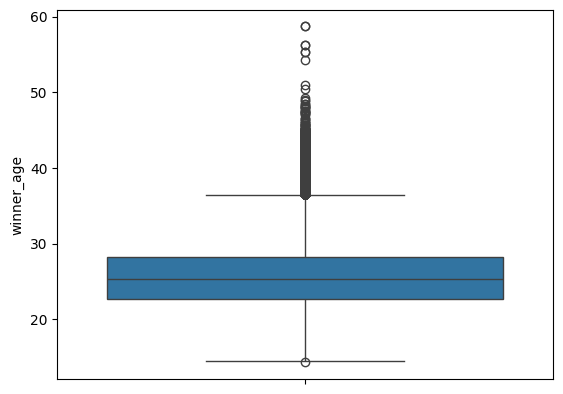

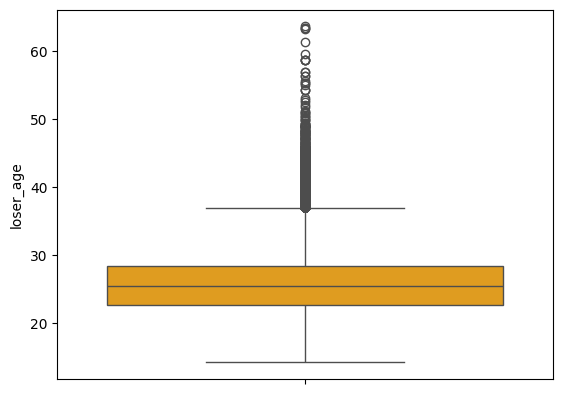

In [12]:
plt.figure()
sns.boxplot(data=df_filtered['winner_age'])
plt.figure()
sns.boxplot(data=df_filtered['loser_age'], color='orange')

<Axes: >

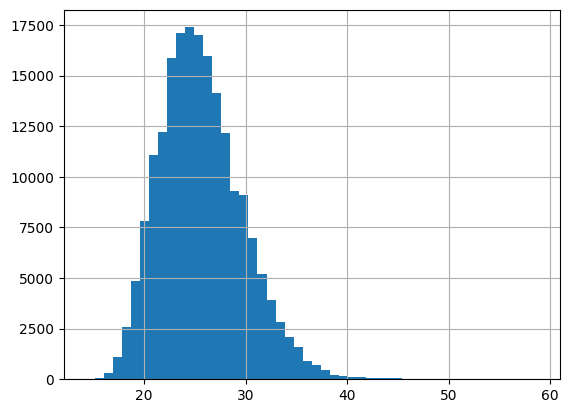

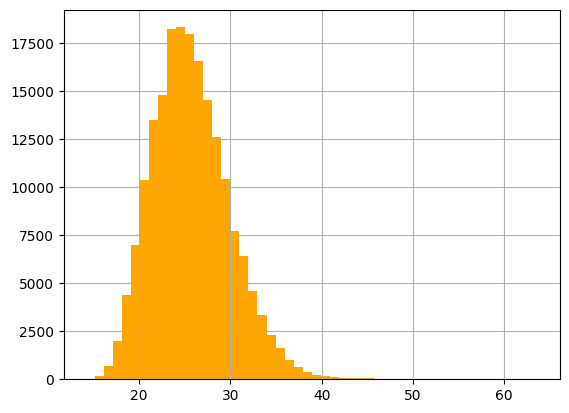

In [13]:
plt.figure()
df_filtered['winner_age'].dropna().hist(bins=50)
plt.figure()
df_filtered['loser_age'].dropna().hist(bins=50, color='orange')


<Axes: ylabel='loser_ht'>

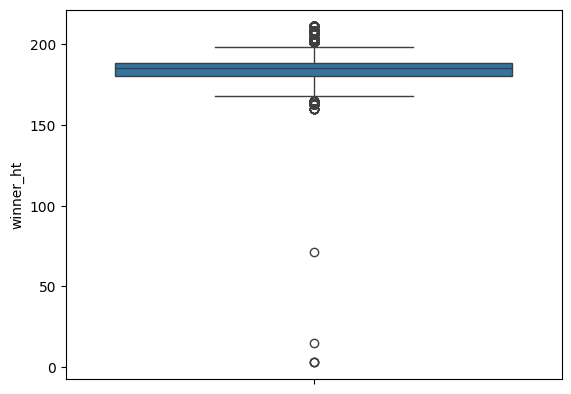

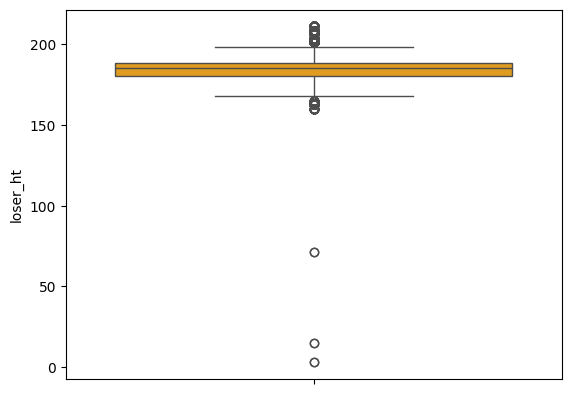

In [14]:
plt.figure()
sns.boxplot(data=df_filtered['winner_ht'])
plt.figure()
sns.boxplot(data=df_filtered['loser_ht'], color='orange')

<Axes: >

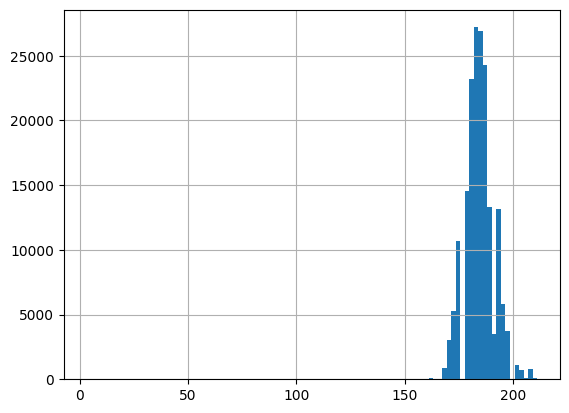

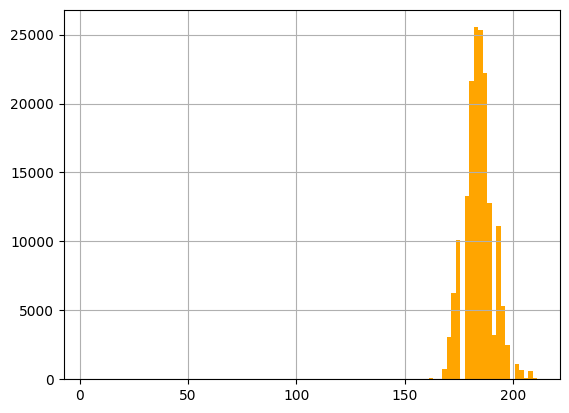

In [15]:
plt.figure()
df_filtered['winner_ht'].dropna().hist(bins=100)
plt.figure()
df_filtered['loser_ht'].dropna().hist(bins=100, color='orange')

# Result of Data Exploration

- A lot of features that can cause data leakage
    - Ex: minutes, that could be such a good information for training the model, but just for training, in real life test that info is available just after the match. So i need to remove these attributes

- Some data have the wrong data type, like tourney_date, it's int64, but is has to be date

- Some values are missing, but most of them are in the attributes that we will remove later, but the others i have to analyze

- Outliers in player_age and player_ht data, more interesting in player_age, some players are over 50 year 

- New attributes ideias came at me while im explorating the date, attributes like, age diference, height diference, rating(mostly used at context of chess, but so useful for rank knowledge), etc.